In [27]:
import numpy as np
import mne
# PYHRV IMPORTS
import biosppy
import pyhrv
import pyhrv.time_domain as td
import pyhrv.tools as tools
#from pecg import Preprocessing as Pre
# MATH
import math

# SKLEARN
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.neural_network import MLPClassifier

# PANDAS
import pandas as pd

In [48]:
file = "ECG_data/01M_1_edited.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from C:\Users\ritzb\JupyterLab\ECG_data\01M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [49]:
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:47:31 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
>


In [50]:
events = mne.events_from_annotations(data)[0]
print(events)
raw_ecg = raw_data[6]
print(len(raw_ecg))

Used Annotations descriptions: ['Event']
[[  1024      0      1]
 [193280      0      1]
 [274304      0      1]
 [285312      0      1]
 [300032      0      1]
 [316288      0      1]
 [324480      0      1]
 [343808      0      1]
 [384256      0      1]
 [399488      0      1]
 [410880      0      1]
 [429440      0      1]
 [504832      0      1]
 [524928      0      1]
 [532608      0      1]
 [559488      0      1]
 [577536      0      1]
 [589568      0      1]
 [604800      0      1]
 [625664      0      1]
 [633088      0      1]
 [651776      0      1]
 [873856      0      1]
 [887936      0      1]
 [932352      0      1]
 [933632      0      1]]
935040


In [51]:
samp_rate = 128
event1_series = raw_ecg[896:120*samp_rate+896]
print(len(event1_series))

15360


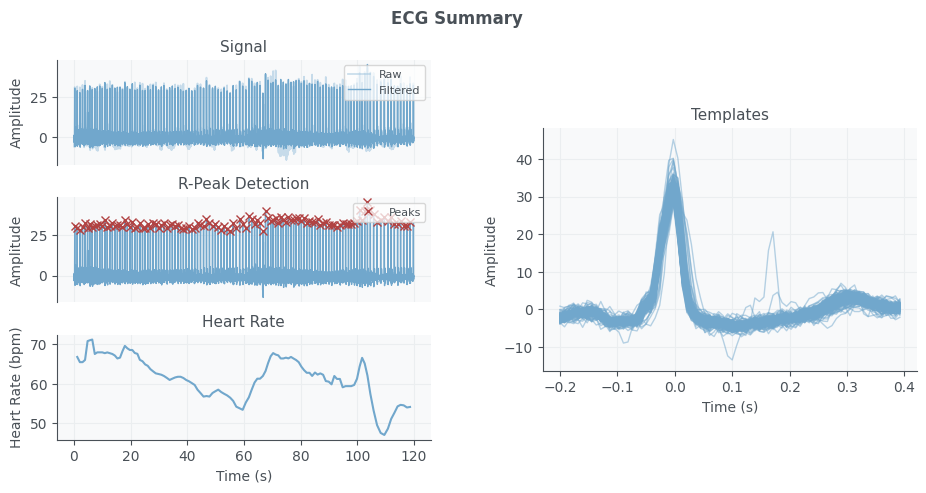

ReturnTuple(hr_mean=61.87384968989552, hr_min=46.265060240963855, hr_max=78.36734693877551, hr_std=5.620221512781029) ReturnTuple(sdnn=94.78013334519359) ReturnTuple(rmssd=50.085376327576896)


In [86]:

ts, filtered, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate = biosppy.signals.ecg.ecg(event1_series, show=True, sampling_rate=128)
rpeaks = rpeaks/128 * 1000
nni = tools.nn_intervals(rpeaks)
hr_params = td.hr_parameters(nni)
sdnn = td.sdnn(nni)
rmssd = td.rmssd(nni)
print(hr_params, sdnn, rmssd)


C:\Users\ritzb\miniconda3\envs\carlaenv\lib\site-packages\pyhrv\utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
C:\Users\ritzb\miniconda3\envs\carlaenv\lib\site-packages\pyhrv\time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
C:\Users\ritzb\miniconda3\envs\carlaenv\lib\site-packages\pyhrv\time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


ReturnTuple(nni_counter=121, nni_mean=978.176652892562, nni_min=765.625, nni_max=1296.875, hr_mean=61.87384968989552, hr_min=46.265060240963855, hr_max=78.36734693877551, hr_std=5.620221512781029, nni_diff_mean=42.057291666666664, nni_diff_min=0, nni_diff_max=140, sdnn=94.78013334519359, sdnn_index=nan, sdann=nan, rmssd=50.085376327576896, sdsd=27.312000124424586, nn50=39, pnn50=32.5, nn20=98, pnn20=81.66666666666667, nni_histogram=<Figure size 600x600 with 1 Axes>, tinn_n=843.75, tinn_m=1046.875, tinn=203.125, tri_index=12.1, fft_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), fft_peak=(0.0166015625, 0.0400390625, 0.3330078125), fft_abs=(4026.755122806682, 791.5746553119876, 499.71791212616165), fft_rel=(75.71867266615841, 14.884685159255225, 9.396642174586361), fft_log=(8.300716150163852, 6.67402419617693, 6.214043763467495), fft_norm=(61.30095342238564, 38.69904657761436), fft_ratio=1.584042989261794, fft_total=5318.047690244831, fft_plot=<Figure size 

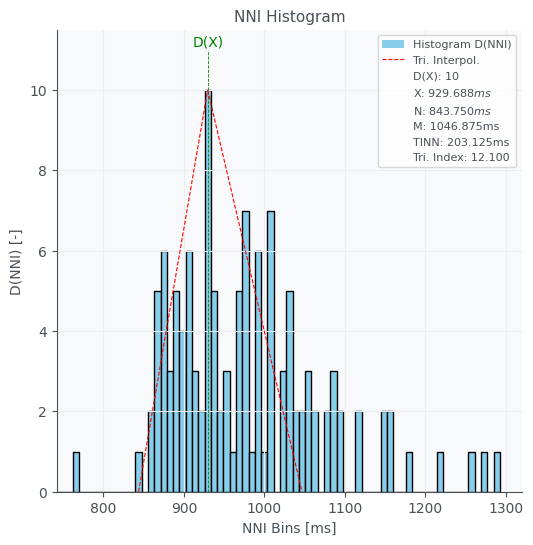

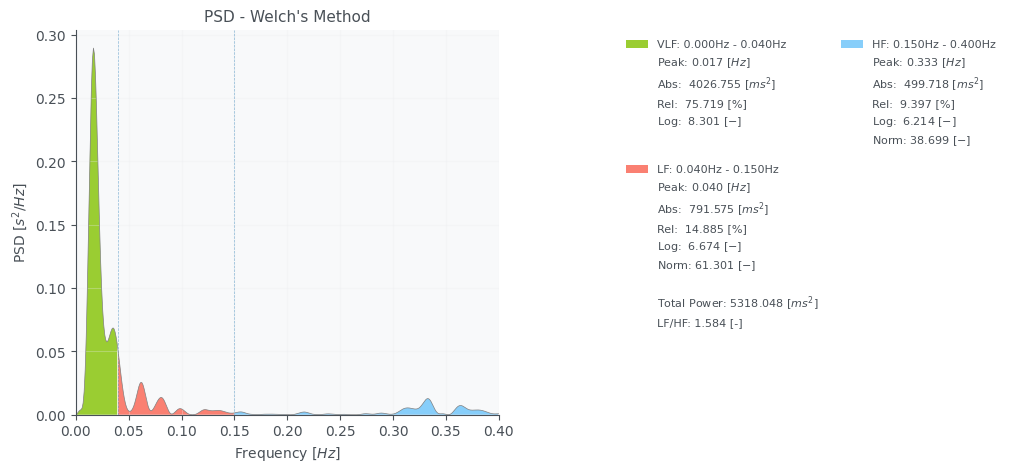

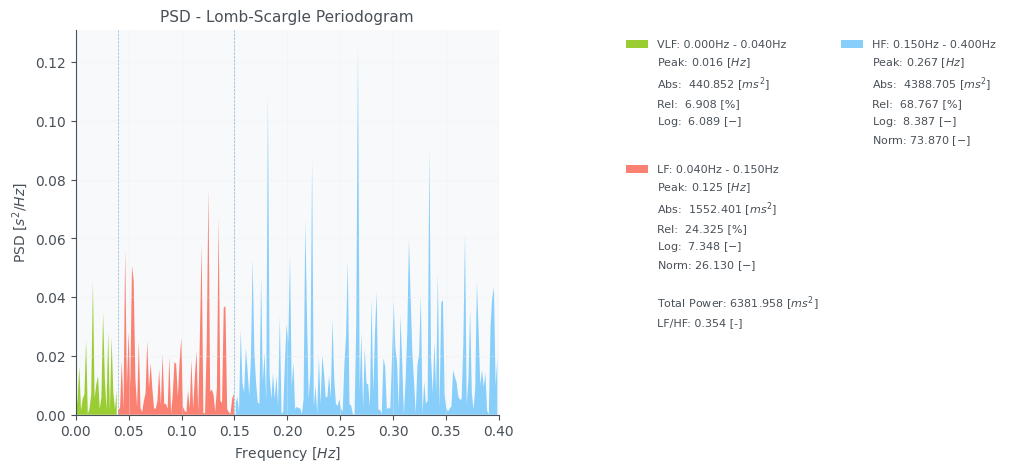

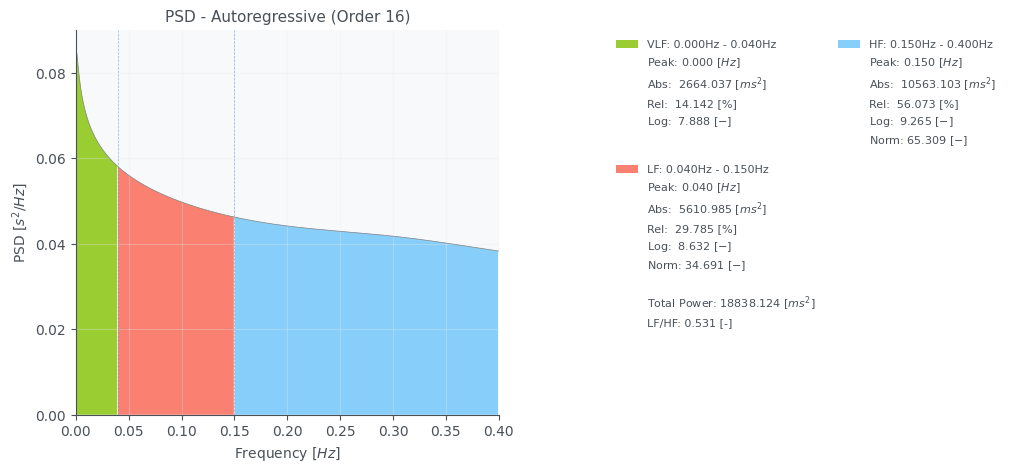

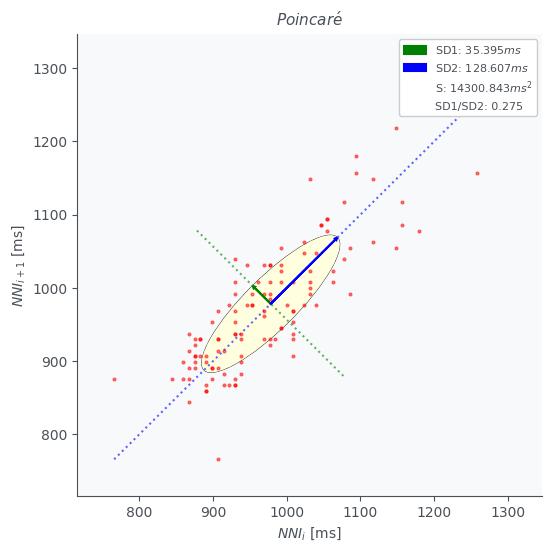

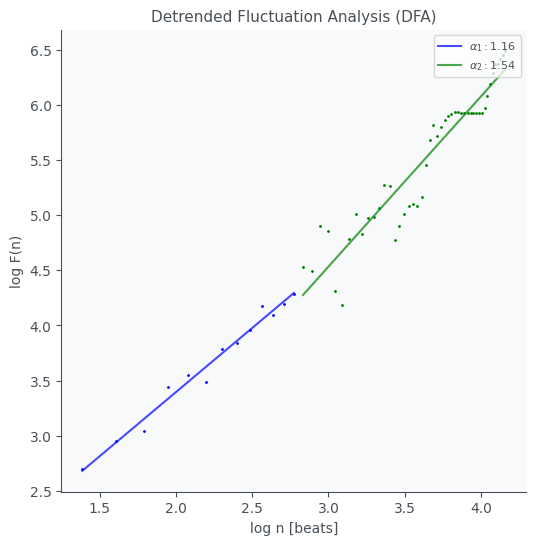

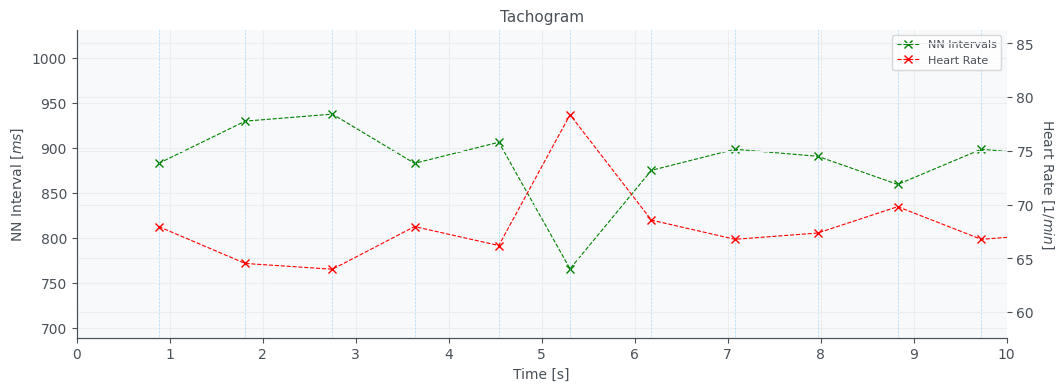

In [87]:
results = pyhrv.hrv(nni)
print(results)

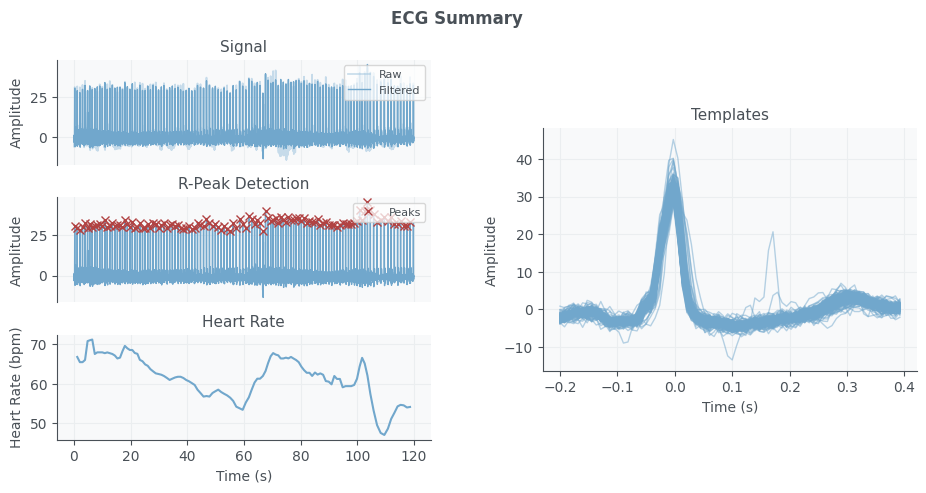

(array([-0.06586286, -0.74346422, -3.1088972 , ..., -1.03700981,
        -0.15163875, -0.02194951]),
 array([   38,   151,   270,   390,   503,   619,   717,   829,   944,
         1058,  1168,  1283,  1397,  1508,  1622,  1737,  1849,  1965,
         2084,  2195,  2303,  2415,  2529,  2639,  2751,  2869,  2980,
         3100,  3220,  3335,  3457,  3582,  3700,  3825,  3951,  4070,
         4197,  4326,  4448,  4573,  4700,  4821,  4946,  5075,  5199,
         5326,  5458,  5585,  5720,  5858,  5991,  6125,  6264,  6391,
         6522,  6658,  6789,  6923,  7062,  7197,  7337,  7488,  7626,
         7769,  7905,  8034,  8163,  8287,  8410,  8539,  8659,  8775,
         8892,  9003,  9115,  9234,  9346,  9462,  9581,  9692,  9809,
         9926, 10039, 10158, 10278, 10397, 10521, 10645, 10764, 10893,
        11012, 11134, 11261, 11382, 11514, 11642, 11767, 11886, 12019,
        12144, 12276, 12407, 12532, 12664, 12793, 12909, 13023, 13139,
        13263, 13395, 13542, 13698, 13861, 1402

In [69]:
biosppy.signals.ecg.ecg(signal=event1_series, sampling_rate=128)[1:3]


In [53]:
events_series_01M_1 = [event1_series]
for event in events[1:-2]:
    events_series_01M_1.append(raw_ecg[event[0]-(60*128):event[0]+(60*128)])
events_series_01M_1.append(raw_ecg[len(raw_ecg)-(120*128):])

In [55]:
file = "ECG_data/01M_2_edited.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from C:\Users\ritzb\JupyterLab\ECG_data\01M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [56]:
events = mne.events_from_annotations(data)[0]
print(events)
raw_ecg = raw_data[6]
print(len(raw_ecg))

Used Annotations descriptions: ['Event']
[[  1664      0      1]
 [ 71168      0      1]
 [ 92032      0      1]
 [100736      0      1]
 [106624      0      1]
 [115200      0      1]
 [136448      0      1]
 [149632      0      1]
 [156160      0      1]
 [159744      0      1]
 [167168      0      1]
 [174720      0      1]
 [176896      0      1]
 [182272      0      1]
 [190336      0      1]
 [193152      0      1]
 [198784      0      1]
 [208384      0      1]
 [216320      0      1]
 [223872      0      1]
 [231808      0      1]
 [234368      0      1]
 [241536      0      1]
 [247040      0      1]
 [269696      0      1]
 [316160      0      1]
 [332928      0      1]
 [350208      0      1]
 [391808      0      1]
 [406400      0      1]
 [417920      0      1]
 [439424      0      1]
 [460288      0      1]
 [467840      0      1]
 [474496      0      1]
 [502400      0      1]
 [506752      0      1]
 [511232      0      1]
 [514176      0      1]
 [525056      0      1]

In [57]:
events_series_01M_2 = []
events_series_01M_2.append(raw_ecg[1152: 120*128+1152])
for event in events[1:-3]:
    events_series_01M_2.append(raw_ecg[event[0]-(60*128):event[0]+(60*128)])
events_series_01M_2.append(raw_ecg[len(raw_ecg)-(120*128):])